/Users/eugene/OneDrive - Nexus365/PhD/4. Rotation 2/panddascore/analysis_notebooks/plotting/confusion_matrix.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_frame['pred_labels_from_threshold'] = (results_frame['pred_probabilities'] > threshold).astype(int)
/Users/eugene/OneDrive - Nexus365/PhD/4. Rotation 2/panddascore/analysis_notebooks/plotting/confusion_matrix.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_frame['pred_labels_from_threshold'] = (results_frame['pred_probabilities

<AxesSubplot:xlabel='system'>

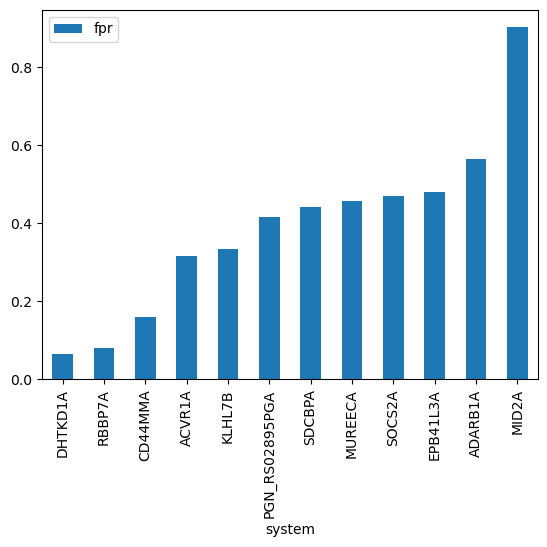

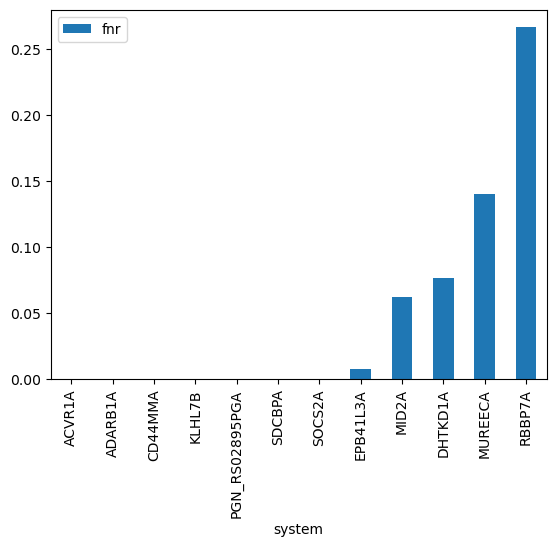

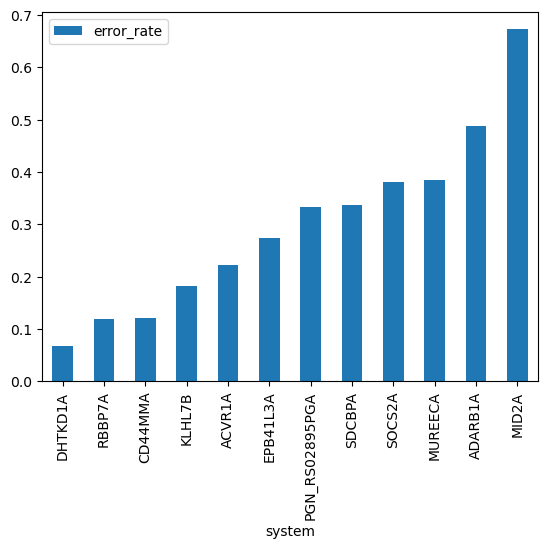

In [47]:
import pathlib
import pandas as pd

#computing fpr, fnr, tpr, tnr, error rate, for all systems
from analysis_notebooks.plotting import confusion_matrix

def compute_tp_fp_tn_fn_all_systems(df, threshold):
    def compute_tp_fp_tn_fn_per_system(df, system, threshold):
        df_system = df[df.system == system]
        frequency = len(df_system)
        true_pos, true_neg, false_pos, false_neg, system_frame = \
            confusion_matrix.compute_true_false_positives_and_negatives(df_system, 
                                                                        threshold)
        
        return {'system': system,
                'frequency': frequency,
                'true_pos': len(true_pos),
                'true_neg': len(true_neg),
                'false_pos': len(false_pos),
                'false_neg': len(false_neg),}
    
    systems = df.system.unique()
    threshold = [threshold] * len(systems)
    dfs = [df] * len(systems)
    lst = list(map(compute_tp_fp_tn_fn_per_system, dfs, systems, threshold))

    return lst

def compute_tpr_fpr_tnr_fnr_from_frame(tp_fp_tn_fn_frame: pd.DataFrame):
    tpr = tp_fp_tn_fn_frame.true_pos / (tp_fp_tn_fn_frame.true_pos + tp_fp_tn_fn_frame.false_neg)
    fpr = tp_fp_tn_fn_frame.false_pos / (tp_fp_tn_fn_frame.false_pos + tp_fp_tn_fn_frame.true_neg)
    tnr = tp_fp_tn_fn_frame.true_neg / (tp_fp_tn_fn_frame.true_neg + tp_fp_tn_fn_frame.false_pos)
    fnr = tp_fp_tn_fn_frame.false_neg / (tp_fp_tn_fn_frame.false_neg + tp_fp_tn_fn_frame.true_pos)
    total  = tp_fp_tn_fn_frame.true_pos + tp_fp_tn_fn_frame.true_neg + tp_fp_tn_fn_frame.false_pos + tp_fp_tn_fn_frame.false_neg
    accuracy = (tp_fp_tn_fn_frame.true_pos + tp_fp_tn_fn_frame.true_neg) / total
    error_rate = 1 - accuracy
    
    tp_fp_tn_fn_frame['tpr'] = tpr
    tp_fp_tn_fn_frame['fpr'] = fpr
    tp_fp_tn_fn_frame['tnr'] = tnr
    tp_fp_tn_fn_frame['fnr'] = fnr
    tp_fp_tn_fn_frame['accuracy'] = accuracy
    tp_fp_tn_fn_frame['error_rate'] = error_rate

    return tp_fp_tn_fn_frame

csvfile = '/Users/eugene/OneDrive - Nexus365/PhD/4. Rotation 2/panddascore/training_results/2022_09_20-07_29_42_PM/output_labels.csv'
# csvfile = '/dls/labxchem/data/2018/lb18145-80/processing/analysis/eugene/pandda_score/training_data_paths/training_set.csv'
df = pd.read_csv(csvfile)
lst = compute_tp_fp_tn_fn_all_systems(df, 0.17)
system_tp_fp_tn_fn_frame = pd.DataFrame(lst)
system_frame = compute_tpr_fpr_tnr_fnr_from_frame(system_tp_fp_tn_fn_frame)

system_frame.sort_values(by=['fpr']).plot.bar(x='system', y='fpr')
system_frame.sort_values(by=['fnr']).plot.bar(x='system', y='fnr')
system_frame.sort_values(by=['error_rate']).plot.bar(x='system', y='error_rate')

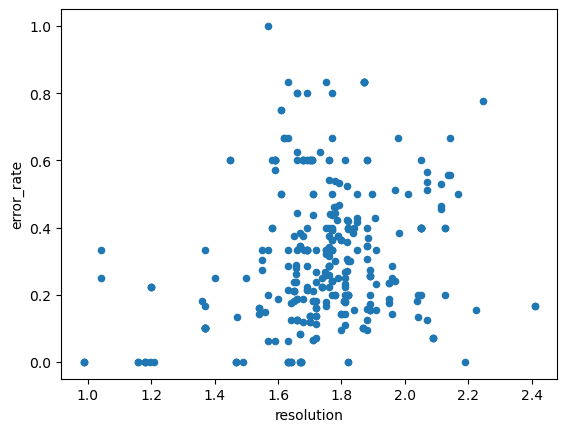

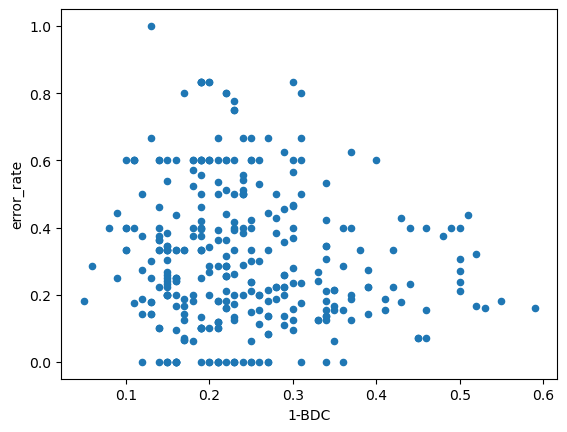

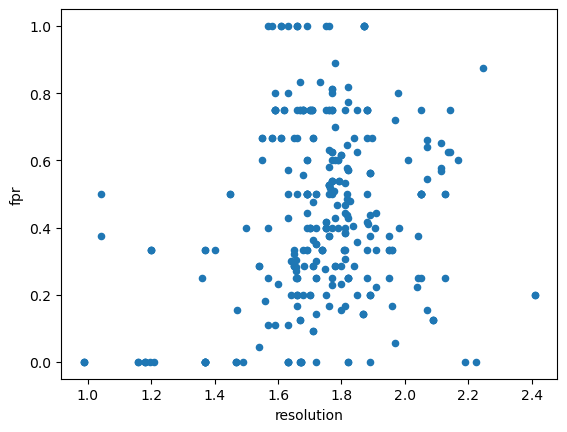

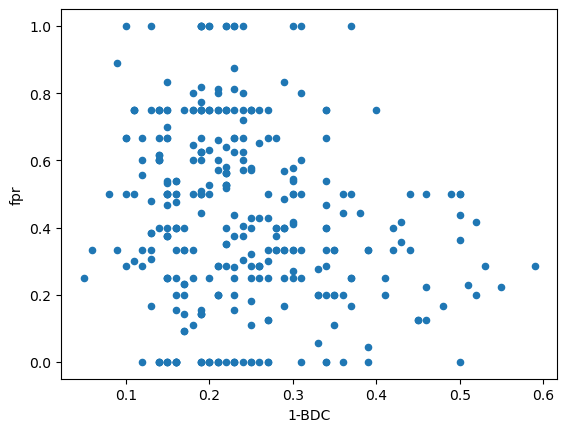

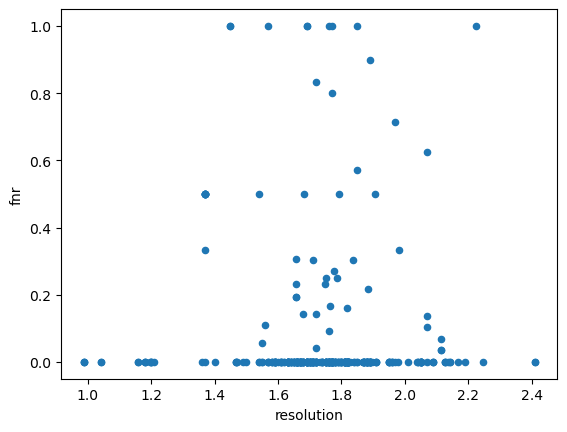

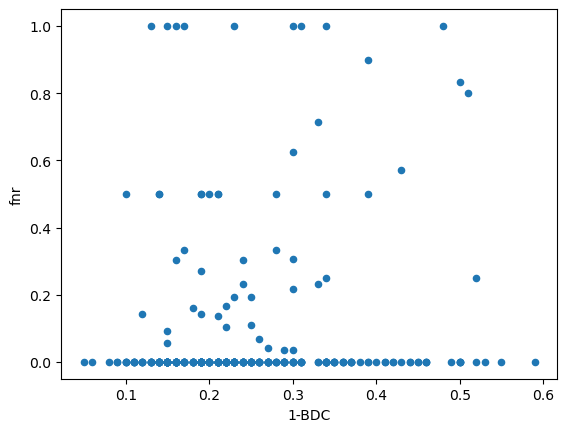

frame["true_neg"]=5.0
[[5. 0.]
 [0. 1.]]
RBBP7A-x0058: /dls/labxchem/data/2021/lb29658-8/processing/analysis/panddas/processed_datasets/RBBP7A-x0058/RBBP7A-x0058-event_1_1-BDC_0.16_map.native.ccp4


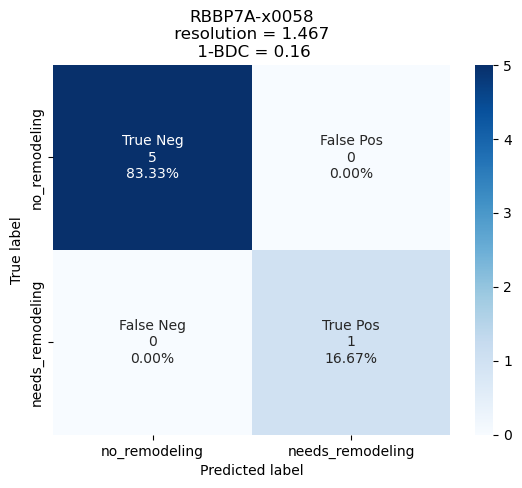

[[3. 0.]
 [0. 1.]]
CD44MMA-x0158: /dls/labxchem/data/2021/lb22717-23/processing/analysis/panddas_2/processed_datasets/CD44MMA-x0158/CD44MMA-x0158-event_1_1-BDC_0.15_map.native.ccp4


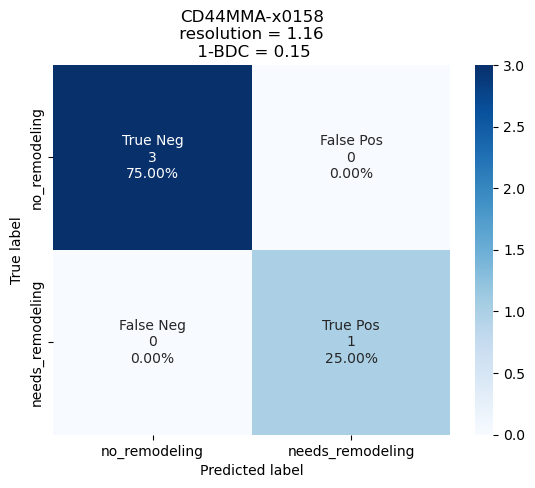

[[4. 0.]
 [0. 1.]]
CD44MMA-x0448: /dls/labxchem/data/2021/lb22717-23/processing/analysis/panddas/processed_datasets/CD44MMA-x0448/CD44MMA-x0448-event_1_1-BDC_0.2_map.native.ccp4


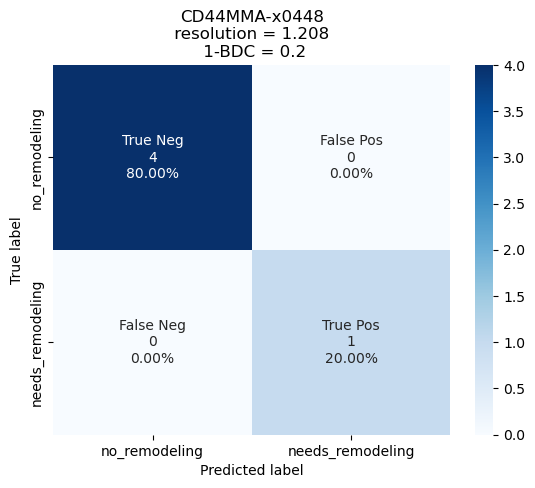

[[0. 3.]
 [1. 0.]]
MID2A-x0794: /dls/labxchem/data/2021/lb29658-1/processing/analysis/panddas/processed_datasets/MID2A-x0794/MID2A-x0794-event_1_1-BDC_0.13_map.native.ccp4


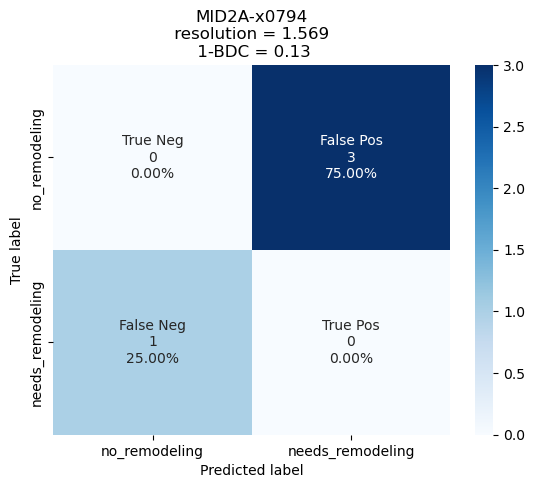

[[0. 5.]
 [0. 1.]]
EPB41L3A-x0162: /dls/labxchem/data/2019/lb22717-1/processing/EPB41L3A/processing/analysis/panddas_old/processed_datasets/EPB41L3A-x0162/EPB41L3A-x0162-event_1_1-BDC_0.19_map.native.ccp4


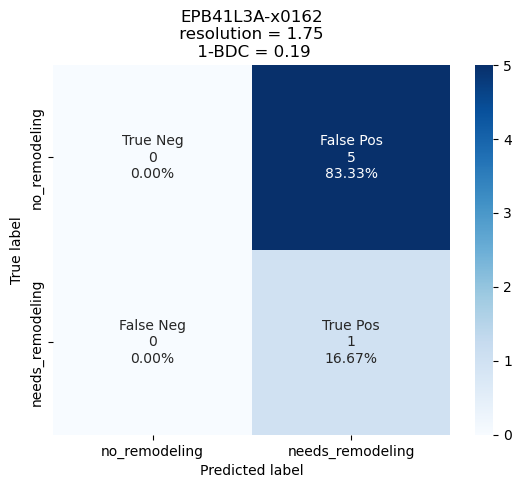

[[0. 5.]
 [0. 1.]]
EPB41L3A-x0161: /dls/labxchem/data/2019/lb22717-1/processing/EPB41L3A/processing/analysis/panddas_excluded/processed_datasets/EPB41L3A-x0161/EPB41L3A-x0161-event_3_1-BDC_0.19_map.native.ccp4


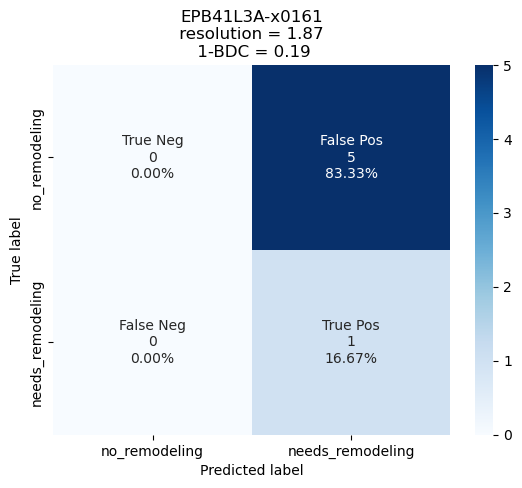

In [101]:
# computing fpr, fnr, tpr, tnr, error rate, for all datasets
def compute_tp_fp_tn_fn_all_datasets(df, threshold):
    def compute_tp_fp_tn_fn_per_dataset(df, dataset, threshold):
        df_dataset = df[df.event_map_name == dataset]

        #drop resolution = 0 dataset
        df_dataset = df_dataset[df_dataset.high_resolution != 0]
        if len(df_dataset) == 0:
            # print('no data for dataset: ', dataset)
            return {'dtag': None,
                'event_map': None,
                'frequency': None,
                'resolution': None,
                '1-BDC': None,
                'true_pos': None,
                'true_neg': None,
                'false_pos': None,
                'false_neg': None,}

        dtag = df_dataset.iloc[0]['dtag']
        resolution = df_dataset.iloc[0]['high_resolution']
        one_minus_BDC = df_dataset.iloc[0]['1-BDC']
        frequency = len(df_dataset)
        true_pos, true_neg, false_pos, false_neg, dataset_frame = \
            confusion_matrix.compute_true_false_positives_and_negatives(df_dataset, 
                                                                        threshold)
        
        return {'dtag': dtag,
                'event_map': dataset,
                'frequency': frequency,
                'resolution': resolution,
                '1-BDC': one_minus_BDC,
                'true_pos': len(true_pos),
                'true_neg': len(true_neg),
                'false_pos': len(false_pos),
                'false_neg': len(false_neg),}
    
    datasets = df.event_map_name.unique()
    threshold = [threshold] * len(datasets)
    dfs = [df] * len(datasets)
    lst = list(map(compute_tp_fp_tn_fn_per_dataset, dfs, datasets, threshold))

    return lst

csvfile = '/Users/eugene/OneDrive - Nexus365/PhD/4. Rotation 2/panddascore/training_results/2022_09_20-07_29_42_PM/output_labels.csv'
# csvfile = '/dls/labxchem/data/2018/lb18145-80/processing/analysis/eugene/pandda_score/training_data_paths/training_set.csv'
df = pd.read_csv(csvfile)
lst = compute_tp_fp_tn_fn_all_datasets(df, 0.17)
dataset_tp_fp_tn_fn_frame = pd.DataFrame(lst)
dataset_tp_fp_tn_fn_frame = dataset_tp_fp_tn_fn_frame[dataset_tp_fp_tn_fn_frame.dtag.notna()]
dataset_frame = compute_tpr_fpr_tnr_fnr_from_frame(dataset_tp_fp_tn_fn_frame)
dataset_frame = dataset_frame[dataset_frame.dtag != "NaN"]

# print(dataset_frame.sort_values(by=['error_rate']))
dataset_frame.plot.scatter(x='resolution', y = 'error_rate')
dataset_frame.plot.scatter(x='1-BDC', y = 'error_rate')

dataset_frame.plot.scatter(x='resolution', y = 'fpr')
dataset_frame.plot.scatter(x='1-BDC', y = 'fpr')

dataset_frame.plot.scatter(x='resolution', y = 'fnr')
dataset_frame.plot.scatter(x='1-BDC', y = 'fnr')
plt.show()

#compute confusion matrix for dataset with best and worst metrics
from analysis_notebooks.plotting import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

def plot_confusion_matrix(dataset_frame_row):
    cm = np.array([[dataset_frame_row['true_neg'], dataset_frame_row['false_pos']],
                    [dataset_frame_row['false_neg'], dataset_frame_row['true_pos']]])
    print(cm)
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    
    group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
    
    labels = np.asarray(labels).reshape(2,2)

    classes = ['no_remodeling', 'needs_remodeling']
    df_cm = pd.DataFrame(cm, index = [i for i in classes],
                  columns = [i for i in classes])
    title = dataset_frame_row['dtag']
    label = dataset_frame_row['dtag']+': '+dataset_frame_row['event_map']
    resolution = dataset_frame_row['resolution']
    one_minus_BDC = dataset_frame_row['1-BDC']
    print(label)
    plt.figure()
    sn.heatmap(df_cm, annot=labels, fmt='', cmap='Blues')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title(f'{title}\n {resolution = } \n 1-BDC = {one_minus_BDC}')
    plt.show()

frame = dataset_frame.sort_values(by=['error_rate']).iloc[0]
print(f'{frame["true_neg"]=}')
plot_confusion_matrix(dataset_frame.sort_values(by=['error_rate']).iloc[0])
plot_confusion_matrix(dataset_frame.sort_values(by=['error_rate']).iloc[1])
plot_confusion_matrix(dataset_frame.sort_values(by=['error_rate']).iloc[2])

plot_confusion_matrix(dataset_frame.sort_values(by=['error_rate']).iloc[-1])
plot_confusion_matrix(dataset_frame.sort_values(by=['error_rate']).iloc[-2])
plot_confusion_matrix(dataset_frame.sort_values(by=['error_rate']).iloc[-3])



In [ ]:
import pandas as pd
import pathlib
from analysis_notebooks.plotting import event_residue_plot, confusion_matrix
from analysis_notebooks.plotting.get_random_sample import get_random_sample

# Inspect true positives
# plotting channels to ensure they are correct

sample = get_random_sample(dataset_frame.sort_values(by=['error_rate']).iloc[0]e)
event_residue_plot.plot(sample)

Metadata = event_residue_plot.ShowMetadata(sample, df)
Metadata.show_metadata()

# inspect on coot (on Diamond Remote Desktop)
Metadata.open_coot(show_output_model=False)